In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


#  한글글꼴로 변경
from matplotlib import rc
import seaborn as sns
%matplotlib inline

rc('font', family='AppleGothic')

plt.rcParams['axes.unicode_minus'] = False

# 그래프 기본 크기 설정 
plt.rcParams['figure.figsize'] = [20, 6]

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('/Users/juheelee/aapyworkspace/1_finalpj/data/부동산데이터분석_회귀분석용 데이터셋_18.1Q와 22.2Q만있음.xlsx')

In [3]:
df.head()

,Unnamed: 0,ID,매매가격18.1Qtarget,등락율18/1,전세가율18/1,전용면적,구별인구,거래량1,거래량18,거래허가제TF,...,중앙난방TF,지역난방TF,복도식TF,혼합형TF,계단식TF,메이저시공사TF,조합시행TF,철근철골구조TF,홈네트워크TF,관리시설수
0,2365,서울특별시 서대문구 냉천동 돈의문센트레빌 110,69000.0,-30.434783,109.4,110,324871,2,3,0,...,0,0,0,0,1,0,1,0,1,8
1,913,서울특별시 광진구 자양동 자양우성7 80,56000.0,-24.553571,102.5,80,371671,1,1,0,...,0,0,0,1,0,0,1,0,0,7
2,3830,서울특별시 용산구 이촌동 동아그린 60,57500.0,-21.739130,58.1,60,245411,2,0,0,...,0,1,0,1,0,0,0,0,1,3
3,2760,서울특별시 성동구 성수동1가 서울숲한양현대 60,51000.0,-17.647059,75.2,60,314551,1,1,0,...,0,0,0,1,0,1,1,0,0,4
4,2607,서울특별시 서초구 서초동 서초이오빌 50,30866.7,-16.711537,82.6,50,445164,6,2,0,...,0,0,0,1,0,0,0,0,1,3


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3295 entries, 0 to 3294
Data columns (total 40 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       3295 non-null   int64  
 1   ID               3295 non-null   object 
 2   매매가격18.1Qtarget  3295 non-null   float64
 3   등락율18/1          3295 non-null   float64
 4   전세가율18/1         3295 non-null   float64
 5   전용면적             3295 non-null   int64  
 6   구별인구             3295 non-null   int64  
 7   거래량1             3295 non-null   int64  
 8   거래량18            3295 non-null   int64  
 9   거래허가제TF          3295 non-null   int64  
 10  아파트TF            3295 non-null   int64  
 11  주상복합TF           3295 non-null   int64  
 12  도시형주택TF          3295 non-null   int64  
 13  일반분양TF           3295 non-null   int64  
 14  복합분양TF           3295 non-null   int64  
 15  임대분양TF           3295 non-null   int64  
 16  사용승인년도           3291 non-null   float64
 17  동당세대수         

In [5]:
# 결측치 개수 확인
df.isnull().sum()

Unnamed: 0          0
ID                  0
매매가격18.1Qtarget     0
등락율18/1             0
전세가율18/1            0
전용면적                0
구별인구                0
거래량1                0
거래량18               0
거래허가제TF             0
아파트TF               0
주상복합TF              0
도시형주택TF             0
일반분양TF              0
복합분양TF              0
임대분양TF              0
사용승인년도              4
동당세대수               0
승강기합계               0
동수                 15
세대수                 0
관리원당세대수             0
승강기당세대수             0
세대당주차수              0
지하주차비율              0
세대당cctv수            0
관리인원수               0
연간소독횟수             68
관리위탁여부              0
개별난방TF              0
중앙난방TF              0
지역난방TF              0
복도식TF               0
혼합형TF               0
계단식TF               0
메이저시공사TF            0
조합시행TF              0
철근철골구조TF            0
홈네트워크TF             0
관리시설수               0
dtype: int64

In [6]:
df.dropna(inplace=True)

In [7]:
#변수 지정
X = df[['등락율18/1', '전세가율18/1', '전용면적', '구별인구', '거래량1', '거래량18', '거래허가제TF', '아파트TF', 
        '주상복합TF', '도시형주택TF', '일반분양TF', '복합분양TF', '임대분양TF', '사용승인년도', '동당세대수', '승강기합계', 
        '동수', '세대수', '관리원당세대수', '승강기당세대수', '세대당주차수', '지하주차비율', '세대당cctv수', '관리인원수',
        '연간소독횟수', '관리위탁여부', '개별난방TF', '중앙난방TF', '지역난방TF', '복도식TF', '혼합형TF', '계단식TF',
        '메이저시공사TF', '조합시행TF', '철근철골구조TF', '홈네트워크TF', '관리시설수']] #독립변수
y = df['매매가격18.1Qtarget'] #종속변수

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3223 entries, 0 to 3294
Data columns (total 40 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       3223 non-null   int64  
 1   ID               3223 non-null   object 
 2   매매가격18.1Qtarget  3223 non-null   float64
 3   등락율18/1          3223 non-null   float64
 4   전세가율18/1         3223 non-null   float64
 5   전용면적             3223 non-null   int64  
 6   구별인구             3223 non-null   int64  
 7   거래량1             3223 non-null   int64  
 8   거래량18            3223 non-null   int64  
 9   거래허가제TF          3223 non-null   int64  
 10  아파트TF            3223 non-null   int64  
 11  주상복합TF           3223 non-null   int64  
 12  도시형주택TF          3223 non-null   int64  
 13  일반분양TF           3223 non-null   int64  
 14  복합분양TF           3223 non-null   int64  
 15  임대분양TF           3223 non-null   int64  
 16  사용승인년도           3223 non-null   float64
 17  동당세대수         

In [9]:
from sklearn.model_selection import train_test_split 
#lr: 알고리즘이 적용된 모델명
from sklearn.linear_model import LinearRegression
lr = LinearRegression() 

# 데이터 트레이닝: 80, 테스트: 20 
Xtrain, Xtest, ytrain, ytest= train_test_split(X, y, test_size=0.2)

Xtrain

,등락율18/1,전세가율18/1,전용면적,구별인구,거래량1,거래량18,거래허가제TF,아파트TF,주상복합TF,도시형주택TF,...,중앙난방TF,지역난방TF,복도식TF,혼합형TF,계단식TF,메이저시공사TF,조합시행TF,철근철골구조TF,홈네트워크TF,관리시설수
1891,2.222222,74.1,60,453902,2,1,0,1,0,0,...,0,0,0,1,0,0,1,0,0,4
133,-3.239978,75.0,80,608361,8,2,0,1,0,0,...,0,0,0,0,1,0,0,0,0,3
2973,9.669139,67.4,120,671994,7,0,0,1,0,0,...,0,1,0,0,1,1,1,0,1,10
1707,1.084011,74.8,80,406715,7,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,5
2331,4.601410,75.9,80,406715,3,0,0,1,0,0,...,0,0,0,1,0,0,1,0,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2284,4.326123,77.4,60,453902,4,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,4
980,0.000000,67.3,60,385624,3,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,3
355,-0.356691,68.9,80,453902,7,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,2
2234,4.044516,76.5,60,490253,7,0,0,1,0,0,...,0,0,0,1,0,1,0,0,1,5


In [10]:
from sklearn.model_selection import train_test_split 
#lr: 알고리즘이 적용된 모델명
from sklearn.linear_model import LinearRegression
lr = LinearRegression() 

# 데이터 트레이닝: 80, 테스트: 20 
Xtrain, Xtest, ytrain, ytest= train_test_split(X, y, test_size=0.2)

ytrain

2268     58600.0
604      89400.0
309      26050.0
2580    155750.0
2752     62700.0
          ...   
2728     48500.0
1494     48033.3
1445     32500.0
1794     28252.9
3036     58000.0
Name: 매매가격18.1Qtarget, Length: 2578, dtype: float64

In [16]:
from sklearn.model_selection import train_test_split 
#lr: 알고리즘이 적용된 모델명
from sklearn.linear_model import LinearRegression
lr = LinearRegression() 

# 데이터 트레이닝: 80, 테스트: 20 
Xtrain, Xtest, ytrain, ytest= train_test_split(X, y, test_size=0.2)

# train 데이터를 사용하여 훈련
lr.fit(Xtrain,ytrain)

#훈련 데이터의 정확도
print(lr.score(Xtrain, ytrain))

#테스트 데이터의 정확도
print(lr.score(Xtest, ytest))

#절편과 기울기 출력
print(lr.intercept_,lr.coef_)


0.7687060790284249
0.7673365083532965
-1125122.9962777253 [ 8.16124854e+02 -1.10297787e+03  6.12689103e+02 -3.14763575e-03
 -3.44436808e+02  1.99300254e+03  3.35314266e+04  7.51442219e+03
 -8.91343989e+03  1.93149083e+04 -6.24638178e+03 -1.71310084e+03
  7.95948261e+03  5.97902597e+02  1.77312049e+01  2.21352669e+02
 -1.16641460e+03 -1.48836024e+01 -1.28233397e+03  4.06468270e+03
  1.27124650e+04  5.57009085e+03  4.23065736e+04  3.30994035e+02
 -4.80914740e+01 -5.88787968e+03 -1.65654927e+04 -1.72094900e+04
 -6.43273325e+03 -2.36338505e+03 -2.27689961e+03  4.64028466e+03
  5.25799096e+03  5.15657994e+03 -4.17502662e+03  1.38171029e+03
  1.43390914e+02]


In [ ]:
# 데이터 standardscaler 사용

# [분석 조건]

# 알고리즘: LinearRegression
# 데이터 셋: 153 rows X 6 columns
# 결측량: 4.79%
# 데이터 셋: 훈련 80%, 테스트: 20%
# 데이터 셋: 스케일링:StandardScaler
# 모델 평가방법: score 출력(R2값) / MSE값/ RMSE값

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3223 entries, 0 to 3294
Data columns (total 40 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       3223 non-null   int64  
 1   ID               3223 non-null   object 
 2   매매가격18.1Qtarget  3223 non-null   float64
 3   등락율18/1          3223 non-null   float64
 4   전세가율18/1         3223 non-null   float64
 5   전용면적             3223 non-null   int64  
 6   구별인구             3223 non-null   int64  
 7   거래량1             3223 non-null   int64  
 8   거래량18            3223 non-null   int64  
 9   거래허가제TF          3223 non-null   int64  
 10  아파트TF            3223 non-null   int64  
 11  주상복합TF           3223 non-null   int64  
 12  도시형주택TF          3223 non-null   int64  
 13  일반분양TF           3223 non-null   int64  
 14  복합분양TF           3223 non-null   int64  
 15  임대분양TF           3223 non-null   int64  
 16  사용승인년도           3223 non-null   float64
 17  동당세대수         

In [25]:
from sklearn.model_selection import train_test_split 
#lr: 알고리즘이 적용된 모델명
from sklearn.linear_model import LinearRegression
lr = LinearRegression() 

# 데이터 트레이닝: 80, 테스트: 20 
Xtrain, Xtest, ytrain, ytest= train_test_split(X, y, test_size=0.2, random_state=42)

#데이터 스케일링 조절: 정규화
from sklearn.preprocessing import StandardScaler



#StandardScaler 객체 생성
scaler = StandardScaler()

#StandardScaler로 훈련데이터(독립변수만) 훈련
scaler.fit(Xtrain)

#훈련데이터 스케일링 적용(독립변수만 적용)
train_scaled = scaler.transform(Xtrain)

#테스트 데이터 스케일링(독립변수만 적용)
test_scaled = scaler.transform(Xtest)




# train 데이터를 사용하여 훈련()
lr.fit(train_scaled, ytrain)

#훈련 데이터의 정확도
print(lr.score(train_scaled, ytrain))

#테스트 데이터의 정확도
print(lr.score(test_scaled, ytest))
print(lr.intercept_,lr.coef_)

0.7312148481392423
0.7016724325683626
68563.15015577576 [ 3.89972632e+03 -1.55575596e+04  1.65584545e+04 -1.43326547e+03
 -5.11163422e+03  4.82590479e+03  6.00992823e+03  7.19136415e+03
  3.11267503e+03 -1.75034286e+03 -6.36107522e+16 -5.68562637e+16
 -3.17862517e+16  1.09118617e+04  4.39411901e+03 -4.18679333e+03
 -1.00717798e+04 -5.72055520e+03 -6.83037040e+03  5.90177310e+03
  5.75012295e+03 -5.58887596e+01  3.42869299e+03  2.78331956e+04
 -3.64609414e+03 -1.71580830e+03 -4.59889134e+04 -2.68227252e+04
 -3.70704293e+04  3.47825594e+17  4.80284335e+17  4.87736451e+17
  5.54621114e+03  3.97908147e+03 -7.38972020e+02  2.07115500e+02
 -4.99913844e+03]


In [ ]:
# 데이터 MinMaxScaler 사용

# [분석 조건]

# 알고리즘: LinearRegression

# 데이터 셋: 153 rows X 6 columns

# 결측량: 4.79%

# 데이터 셋: 훈련 80%, 테스트: 20%

# 데이터 셋: 스케일링:MinMaxScaler

# 모델 평가방법: score 출력(R2값) / MSE값/ RMSE값

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3223 entries, 0 to 3294
Data columns (total 40 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       3223 non-null   int64  
 1   ID               3223 non-null   object 
 2   매매가격18.1Qtarget  3223 non-null   float64
 3   등락율18/1          3223 non-null   float64
 4   전세가율18/1         3223 non-null   float64
 5   전용면적             3223 non-null   int64  
 6   구별인구             3223 non-null   int64  
 7   거래량1             3223 non-null   int64  
 8   거래량18            3223 non-null   int64  
 9   거래허가제TF          3223 non-null   int64  
 10  아파트TF            3223 non-null   int64  
 11  주상복합TF           3223 non-null   int64  
 12  도시형주택TF          3223 non-null   int64  
 13  일반분양TF           3223 non-null   int64  
 14  복합분양TF           3223 non-null   int64  
 15  임대분양TF           3223 non-null   int64  
 16  사용승인년도           3223 non-null   float64
 17  동당세대수         

In [28]:
from sklearn.model_selection import train_test_split 
df = pd.read_excel('/Users/juheelee/aapyworkspace/1_finalpj/data/부동산데이터분석_회귀분석용 데이터셋_18.1Q와 22.2Q만있음.xlsx')
df.info()

# 데이터 트레이닝: 80, 테스트: 20 
Xtrain, Xtest, ytrain, ytest= train_test_split(X, y, test_size=0.2, random_state=42)


#k-fold적용


#데이터 스케일링 조절: 정규화
from sklearn.preprocessing import MinMaxScaler

#MinMaxScaler 객체 생성
#MinMaxScaler로 데이터 셋트 변환, fit()과  transform() 호출
MinMax = MinMaxScaler()

# 교차검증용 스케일
MinMax.fit(Xtrain)
Min_train_scaled = MinMax.transform(Xtrain)
Min_test_scaled = MinMax.transform(Xtest)


#k-fold적용


# train 데이터를 사용하여 훈련
lr.fit(Min_train_scaled, ytrain)

#훈련 데이터의 정확도
print(lr.score(Min_train_scaled, ytrain))

#테스트 데이터의 정확도
print(lr.score(Min_test_scaled, ytest))
#테스트 데이터의 정확도
print(lr.score(test_scaled, ytest))
print(lr.intercept_,lr.coef_)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3295 entries, 0 to 3294
Data columns (total 40 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       3295 non-null   int64  
 1   ID               3295 non-null   object 
 2   매매가격18.1Qtarget  3295 non-null   float64
 3   등락율18/1          3295 non-null   float64
 4   전세가율18/1         3295 non-null   float64
 5   전용면적             3295 non-null   int64  
 6   구별인구             3295 non-null   int64  
 7   거래량1             3295 non-null   int64  
 8   거래량18            3295 non-null   int64  
 9   거래허가제TF          3295 non-null   int64  
 10  아파트TF            3295 non-null   int64  
 11  주상복합TF           3295 non-null   int64  
 12  도시형주택TF          3295 non-null   int64  
 13  일반분양TF           3295 non-null   int64  
 14  복합분양TF           3295 non-null   int64  
 15  임대분양TF           3295 non-null   int64  
 16  사용승인년도           3291 non-null   float64
 17  동당세대수         

In [13]:
#[모델 구성: OLS알고리즘]#
#OLS 알고리즘을 사용하기 위해 import
import statsmodels.api as sm

In [14]:
#전달이 사이킷런 알고리즘들과 다르다.
#알고리즘 OLS에 데이터 전달이 * (y,X) 주의
import statsmodels.api as sm

model = sm.OLS(y, X)
result = model.fit()
result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        매매가격18.1Qtarget   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     303.5
Date:                Thu, 22 Sep 2022   Prob (F-statistic):               0.00
Time:                        22:24:53   Log-Likelihood:                -36883.
No. Observations:                3223   AIC:                         7.384e+04
Df Residuals:                    3187   BIC:                         7.406e+04
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
등락율18/1      753.0771     83.158      9.056      0.000     590.028     916.127
전세가율18/1   -1100.9042     40.734    -27.027      0.000   -1180.771   -1021.037
전용면적         617.2875     19.062     32.384      0.000     579.913     654.662
구별인구          -0.0022      0.004     -0.549      0.583      -0.010       0.006
거래량1        -369.2522     75.855     -4.868      0.000    -517.981    -220.523
거래량18       2284.8141    416.686      5.483      0.000    1467.814    3101.814
거래허가제TF     3.147e+04   2287.819     13.755      0.000     2.7e+04     3.6e+04
아파트TF       7410.7598   1.03e+04      0.718      0.473   -1.28e+04    2.76e+04
주상복합TF      -1.02e+04   1.04e+04     -0.977      0.329   -3.07e+04    1.03e+04
도시형주택TF     2.159e+04   1.29e+04      1.676      0.094   -3668.160    4.69e+04
일반분양TF     -5.551e+05   1.11e+05     -5.021      0.000   -7.72e+05   -3.38e+05
복합분양TF     -5.494e+05   1.11e+05     -4.943      0.000   -7.67e+05   -3.31e+05
임대분양TF     -5.423e+05   1.11e+05     -4.873      0.000    -7.6e+05   -3.24e+05
사용승인년도       579.2698    111.000      5.219      0.000     361.632     796.908
동당세대수         16.6277      9.653      1.723      0.085      -2.299      35.554
승강기합계        188.9258     58.419      3.234      0.001      74.383     303.469
동수         -1191.8412    115.310    -10.336      0.000   -1417.931    -965.751
세대수          -13.4727      1.829     -7.365      0.000     -17.059      -9.886
관리원당세대수    -1239.6005    181.065     -6.846      0.000   -1594.616    -884.585
승강기당세대수     3774.8611    538.411      7.011      0.000    2719.194    4830.528
세대당주차수      1.207e+04   1607.558      7.506      0.000    8914.207    1.52e+04
지하주차비율      5903.7704   1952.619      3.024      0.003    2075.254    9732.287
세대당cctv수    4.542e+04   4663.330      9.740      0.000    3.63e+04    5.46e+04
관리인원수        385.5146    128.271      3.005      0.003     134.012     637.017
연간소독횟수         5.0934     77.807      0.065      0.948    -147.463     157.650
관리위탁여부     -5451.6381   1432.290     -3.806      0.000   -8259.942   -2643.335
개별난방TF     -6983.2921   1.35e+04     -0.518      0.604   -3.34e+04    1.94e+04
중앙난방TF     -7883.7947   1.36e+04     -0.581      0.561   -3.45e+04    1.87e+04
지역난방TF      3790.4671   1.35e+04      0.281      0.779   -2.27e+04    3.03e+04
복도식TF      -5.512e+05   1.11e+05     -4.967      0.000   -7.69e+05   -3.34e+05
혼합형TF       -5.51e+05   1.11e+05     -4.967      0.000   -7.68e+05   -3.33e+05
계단식TF      -5.446e+05   1.11e+05     -4.905      0.000   -7.62e+05   -3.27e+05
메이저시공사TF    6016.5718    915.115      6.575      0.000    4222.297    7810.846
조합시행TF      5492.6505    939.967      5.843      0.000    3649.649    7335.652
철근철골구조TF   -3628.2887   1691.169     -2.145      0.032   -6944.178    -312.399
홈네트워크TF     1627.0714   1188.132      1.369      0.171    -702.509    3956.652
관리

In [ ]:
# ==================================
# ==================================
... ???
... ing

# XGBoost

In [60]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb


# 데이터 트레이닝: 80, 테스트: 20 
Xtrain, Xtest, ytrain, ytest= train_test_split(X, y, test_size=0.2)

param = {
    'max_depth':[2,3,4],
    'n_estimators':range(550,700,50),
    'colsample_bytree':[0.5,0.7,1],
    'colsample_bylevel':[0.5,0.7,1],
}
model = xgb.XGBRegressor()
grid_search = GridSearchCV(estimator=model, param_grid=param, cv=5, 
                           scoring='neg_mean_squared_error',
                           n_jobs=-1)

grid_search.fit(Xtrain, ytrain)
print(grid_search.best_params_)
print(grid_search.best_estimator_)


{'colsample_bylevel': 0.7, 'colsample_bytree': 0.7, 'max_depth': 2, 'n_estimators': 650}
XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=0.7, colsample_bynode=1, colsample_bytree=0.7,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=2, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=650, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)


In [ ]:

# n_estimators : 학습 모델의 수, 많아질수록 성능 향상의 가능성이 있으나, 속도 느려짐
# learning_rate : 학습률, 너무 크면 gradient 발산의 가능성이 있으며, 너무 작으면 학습이 느림
# max_depth : 최대 탐색 깊이, 너무 크면 과적합 가능성, 너무 작으면 학습 성능 저하
# min_samples_split : 분할 종료 최소 샘플 수, 큰 수면 과적합을 막지만 학습 성능 저하 가능성
# min_samples_leaf : leaf node가 되기 위한 최소 샘플 수, min_samples_split과 비슷한 용도
# random_state : 특정 숫자로 고정 시에 실행 시마다 고정된 결과 반환


In [44]:
import pandas as pd
from sklearn.datasets import load_boston
import xgboost
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score

# df_18 = pd.read_excel('/Users/juheelee/aapyworkspace/1_finalpj/data/부동산데이터분석_회귀분석용 데이터셋_18.1Q와 22.2Q만있음.xlsx')

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y ,test_size=0.1)
xgb_model = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)

print(len(Xtrain), len(Xtest))
xgb_model.fit(Xtrain,ytrain)

2965 330


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.08, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=7, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [39]:
xgb_model.predict

,Unnamed: 0,ID,매매가격18.1Qtarget,등락율18/1,전세가율18/1,전용면적,구별인구,거래량1,거래량18,거래허가제TF,...,중앙난방TF,지역난방TF,복도식TF,혼합형TF,계단식TF,메이저시공사TF,조합시행TF,철근철골구조TF,홈네트워크TF,관리시설수
0,2365,서울특별시 서대문구 냉천동 돈의문센트레빌 110,69000.0,-30.434783,109.4,110,324871,2,3,0,...,0,0,0,0,1,0,1,0,1,8
1,913,서울특별시 광진구 자양동 자양우성7 80,56000.0,-24.553571,102.5,80,371671,1,1,0,...,0,0,0,1,0,0,1,0,0,7
2,3830,서울특별시 용산구 이촌동 동아그린 60,57500.0,-21.739130,58.1,60,245411,2,0,0,...,0,1,0,1,0,0,0,0,1,3
3,2760,서울특별시 성동구 성수동1가 서울숲한양현대 60,51000.0,-17.647059,75.2,60,314551,1,1,0,...,0,0,0,1,0,1,1,0,0,4
4,2607,서울특별시 서초구 서초동 서초이오빌 50,30866.7,-16.711537,82.6,50,445164,6,2,0,...,0,0,0,1,0,0,0,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3290,2191,서울특별시 마포구 도화동 도화동현대 50,59000.0,28.813559,55.9,50,385624,0,2,0,...,1,0,0,1,0,1,1,0,0,3
3291,3041,서울특별시 성북구 안암동3가 대광 40,13075.0,34.990440,66.3,40,453902,4,1,0,...,0,0,0,0,1,0,0,0,0,2
3292,815,서울특별시 관악구 신림동 라이프 60,31000.0,35.483871,90.3,60,522292,1,0,0,...,0,0,0,0,1,0,0,0,0,3
3293,2572,서울특별시 서초구 방배동 임광 140,142250.0,36.731107,53.8,140,445164,4,0,0,...,1,0,0,1,0,0,0,0,0,4


In [40]:
#변수 지정
X = df[['등락율18/1', '전세가율18/1', '전용면적', '구별인구', '거래량1', '거래량18', '거래허가제TF', '아파트TF', 
        '주상복합TF', '도시형주택TF', '일반분양TF', '복합분양TF', '임대분양TF', '사용승인년도', '동당세대수', '승강기합계', 
        '동수', '세대수', '관리원당세대수', '승강기당세대수', '세대당주차수', '지하주차비율', '세대당cctv수', '관리인원수',
        '연간소독횟수', '관리위탁여부', '개별난방TF', '중앙난방TF', '지역난방TF', '복도식TF', '혼합형TF', '계단식TF',
        '메이저시공사TF', '조합시행TF', '철근철골구조TF', '홈네트워크TF', '관리시설수']] #독립변수
y = df['매매가격18.1Qtarget'] #종속변수

In [41]:
X

,등락율18/1,전세가율18/1,전용면적,구별인구,거래량1,거래량18,거래허가제TF,아파트TF,주상복합TF,도시형주택TF,...,중앙난방TF,지역난방TF,복도식TF,혼합형TF,계단식TF,메이저시공사TF,조합시행TF,철근철골구조TF,홈네트워크TF,관리시설수
0,-30.434783,109.4,110,324871,2,3,0,1,0,0,...,0,0,0,0,1,0,1,0,1,8
1,-24.553571,102.5,80,371671,1,1,0,1,0,0,...,0,0,0,1,0,0,1,0,0,7
2,-21.739130,58.1,60,245411,2,0,0,1,0,0,...,0,1,0,1,0,0,0,0,1,3
3,-17.647059,75.2,60,314551,1,1,0,1,0,0,...,0,0,0,1,0,1,1,0,0,4
4,-16.711537,82.6,50,445164,6,2,0,0,1,0,...,0,0,0,1,0,0,0,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3290,28.813559,55.9,50,385624,0,2,0,1,0,0,...,1,0,0,1,0,1,1,0,0,3
3291,34.990440,66.3,40,453902,4,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,2
3292,35.483871,90.3,60,522292,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,3
3293,36.731107,53.8,140,445164,4,0,0,1,0,0,...,1,0,0,1,0,0,0,0,0,4


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

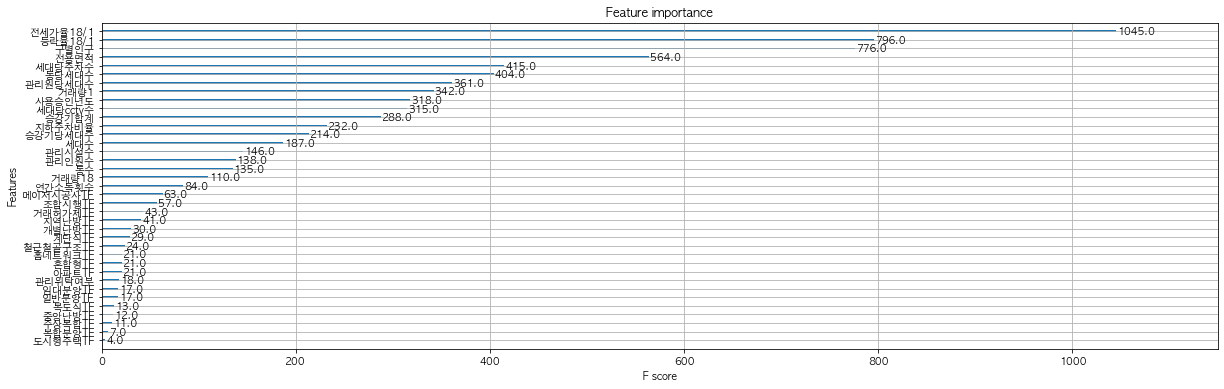

In [45]:
xgboost.plot_importance(xgb_model)

In [47]:
predictions = xgb_model.predict(Xtest)
predictions

array([ 66151.69 ,  83335.06 ,  39916.02 ,  61760.473, 142581.62 ,
        25448.932,  66784.8  , 163404.11 , 106081.586, 121921.63 ,
        47721.652,  55492.355,  78091.53 ,  39842.723,  61834.85 ,
        61279.22 ,  23112.006,  42919.38 ,  94115.555,  38962.668,
        64143.285,  76567.4  ,  31989.508,  30381.914,  80161.8  ,
       125335.58 ,  70227.7  ,  38307.926, 100407.164,  34473.094,
        98162.09 ,  47326.297,  22082.705, 122099.96 ,  29126.377,
        58636.625,  40931.723,  57503.02 ,  78742.87 ,  54186.84 ,
        68530.81 ,  47217.258,  73686.15 ,  68502.38 ,  48204.887,
        65274.35 ,  81002.08 ,  48483.37 ,  26513.664,  45766.71 ,
        75491.07 ,  78557.164,  43212.3  ,  61193.234,  46340.6  ,
        63835.934, 144710.25 ,  97242.28 ,  30687.1  , 205173.56 ,
       147413.14 ,  44007.145,  38203.188, 160281.31 , 123225.914,
        54697.363,  26381.361, 119201.59 ,  45875.008,  83995.15 ,
        28417.494,  49645.477,  62765.863,  70535.375,  74423.

In [48]:
r_sq = xgb_model.score(Xtrain, ytrain)
print(r_sq)
print(explained_variance_score(predictions,ytest))

0.9908575515028613
0.8497625532942412


In [49]:
r_sq = xgb_model.score(Xtest, ytest)
print(r_sq)
print(explained_variance_score(predictions,ytest))

0.8873465473253663
0.8497625532942412


In [ ]:
# ------------------------------------------------

In [ ]:
# ------------------------------------------------

In [ ]:
# ------------------------------------------------